# Native Python Perceptron Implementation

## Author: Mugdhesh Pandkar

Inspired by https://www.youtube.com/watch?v=GVsUOuSjvcg and https://en.wikipedia.org/wiki/Perceptron.

In [390]:
HEIGHT, WIDTH = 20, 20
weights = [[0] * WIDTH for x in range(HEIGHT)]
input = [[0] * WIDTH for x in range(HEIGHT)]
BIAS = 10
ITERATIONS = 200
EPOCHS = 2000

## Visualizing the layer

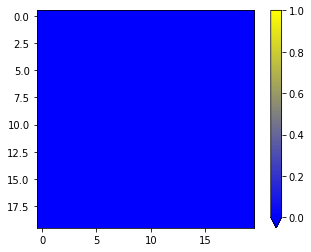

In [375]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


def visualize(layer):
    # cmap = colors.ListedColormap(['red', 'green'])
    # bounds = [0, 0.5, 1]
    # norm = colors.BoundaryNorm(bounds, cmap.N)

    # fig, ax = plt.subplots()
    # ax.imshow(layer, cmap=cmap, norm=norm)

    # # draw gridlines
    # ax.grid(linestyle='-', color='k', linewidth=1)
    # ax.set_xticks(np.arange(-0.5, 20, 1))
    # ax.set_yticks(np.arange(-0.5, 20, 1))

    # ax.set_yticklabels([])
    # ax.set_xticklabels([])

    # plt.show()

    nodes = [0, 1.0]
    colors = ["blue", "yellow"]
    cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, colors)))

    fig, ax = plt.subplots()
    im = ax.imshow(layer, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(im, extend="min")
    plt.show()


visualize(input)

In [376]:
def visualize_weights(weights):
    nodes = [0, 1.0]
    data = [[0] * WIDTH for x in range(HEIGHT)]

    OldRange = 70 # -20, 20  
    NewRange = 1 # 0, 1  
    for y in range(HEIGHT):
        for x in range(WIDTH):
            data[y][x] = (((weights[y][x] - -50) * NewRange) / OldRange)
    colors = ["blue", "yellow"]
    cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, colors)))

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(im, extend="min")
    plt.show()

## Generating Training Data

### Rectangles

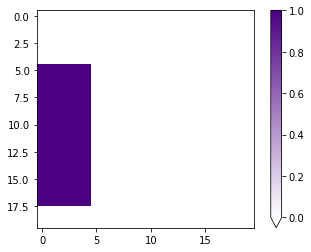

In [312]:
from random import randint
def generate_rect(layer):
    layer = [[0] * WIDTH for x in range(HEIGHT)]
    x = randint(0, WIDTH - 3)
    y = randint(0, HEIGHT -  3)

    width = randint(2, WIDTH - x)
    height = randint(2, HEIGHT - y)
    
    for i in range(y, y + height):
        for j in range(x, x + width):
            layer[i][j] = 1
    
    return layer

input = generate_rect(input)
visualize(input)

### Circles

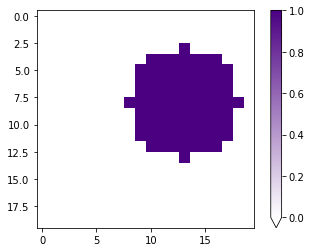

In [313]:
def generate_circle(layer):
    layer = [[0] * WIDTH for x in range(HEIGHT)]

    x = randint(2, WIDTH - 2)
    y = randint(2, HEIGHT - 2)

    minRadius = min(min(HEIGHT - 1 - y, y - 1), min(WIDTH - 1 - x, x - 1))


    r = 2 if minRadius < 2 else randint(2, minRadius)
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if pow(j - x, 2) + pow(i - y, 2) <= r**2:
                layer[i][j] = 1
    
    return layer

input = generate_circle(input)
visualize(input)

# Training

In [314]:
def activation(weights, layer):
    sum = 0
    for i in range(HEIGHT):
        for j in range(WIDTH):
            sum += weights[i][j] * layer[i][j]

    return sum

def add_weight(weights, layer):
    for x in range(HEIGHT):
        for y in range(WIDTH):
            weights[x][y] += layer[x][y]

    return weights

def subtract_weight(weights, layer):
    for x in range(HEIGHT):
        for y in range(WIDTH):
            weights[x][y] -= layer[x][y]

    return weights

In [392]:
def train(input, weights):
    for x in range(EPOCHS):
        correct = 0
        adjusted = 0
        for y in range(ITERATIONS):
            input = generate_rect(input)
            if(activation(weights, input) > BIAS):
                weights = subtract_weight(weights, input)
                adjusted += 1
            else:
                correct += 1

            input = generate_circle(input)
            if(activation(weights, input) < BIAS):
                weights = add_weight(weights, input)
                adjusted += 1   
            else:
                correct += 1
        accuracy = correct / (ITERATIONS * 2)
        print(f"Epoch {x}, Iteration {y}: {accuracy}% Accuracy, Adjusted:{adjusted}")
    
    print("Training Complete!")
    return weights

In [294]:
def test(input, weights):
    correct = 0
    for x in range(ITERATIONS):
        input = generate_rect(input)
        if(activation(weights, input) > BIAS):
            weights = subtract_weight(weights, input)
        else:
            correct += 1

        input = generate_circle(input)
        if(activation(weights, input) < BIAS):
            weights = add_weight(weights, input)   
        else:
            correct += 1
    accuracy = correct / (ITERATIONS * 2)
    print(f"Testing Complete! Final Accuracy: {accuracy}%")

In [300]:
def predict(input, weights):
    sum = activation(weights, input)
    if sum > BIAS:
        print("Predicted Circle")
    else:
        print("Predicted Rectangle")

In [393]:
weights = train(input, weights)
test(input, weights)

Epoch 0, Iteration 199: 0.5675% Accuracy, Adjusted:173
Epoch 1, Iteration 199: 0.5625% Accuracy, Adjusted:175
Epoch 2, Iteration 199: 0.555% Accuracy, Adjusted:178
Epoch 3, Iteration 199: 0.4925% Accuracy, Adjusted:203
Epoch 4, Iteration 199: 0.5725% Accuracy, Adjusted:171
Epoch 5, Iteration 199: 0.51% Accuracy, Adjusted:196
Epoch 6, Iteration 199: 0.5175% Accuracy, Adjusted:193
Epoch 7, Iteration 199: 0.51% Accuracy, Adjusted:196
Epoch 8, Iteration 199: 0.535% Accuracy, Adjusted:186
Epoch 9, Iteration 199: 0.52% Accuracy, Adjusted:192
Epoch 10, Iteration 199: 0.5575% Accuracy, Adjusted:177
Epoch 11, Iteration 199: 0.545% Accuracy, Adjusted:182
Epoch 12, Iteration 199: 0.5125% Accuracy, Adjusted:195
Epoch 13, Iteration 199: 0.5525% Accuracy, Adjusted:179
Epoch 14, Iteration 199: 0.605% Accuracy, Adjusted:158
Epoch 15, Iteration 199: 0.5225% Accuracy, Adjusted:191
Epoch 16, Iteration 199: 0.5425% Accuracy, Adjusted:183
Epoch 17, Iteration 199: 0.5275% Accuracy, Adjusted:189
Epoch 18, It

In [285]:
import pickle

with open("weights.pkl", "wb") as f:
    pickle.dump(weights, f)

with open("weights.pkl", "rb") as f:
    weights = pickle.load(f)

Predicted Circle
[[-2, -27, 6, -6, 0, -4, -2, -5, 0, 0, -13, -6, -1, -2, -4, -4, -6, -8, 11, -31], [-27, -6, -7, 11, 2, 4, -13, -7, -6, -10, -2, -5, -9, -7, -10, -12, -3, 4, -2, -15], [-2, 3, -9, -1, -9, 6, 0, 4, 6, 2, 2, 4, 5, 11, -2, 6, 5, -5, -2, 11], [-14, -6, -9, -2, 1, -5, 10, -3, -5, -1, -8, 4, -10, 1, -1, -3, -5, 3, 4, 3], [-3, -1, 10, 7, -3, 4, -5, -2, 1, -2, 5, -1, -8, 2, -6, -5, 3, -3, 0, -1], [-3, -10, -6, -1, -2, -3, -4, 0, -3, -2, 1, 3, -1, 1, -6, 0, 8, -4, 0, 2], [4, -9, 4, 0, 1, 3, 5, -3, 3, 7, -5, -3, 0, -1, 6, -6, -8, 9, 3, -10], [-2, -3, 7, 1, 3, -3, -2, -5, 3, -3, 5, -1, 6, 4, 3, -4, 2, -1, 0, -4], [-8, 1, 1, 1, -5, 9, -1, 0, 8, -2, 4, -2, 0, 5, -2, -1, -9, -4, 3, 2], [-10, -1, -2, 2, 1, 7, 3, 3, -1, -8, 0, 2, -4, -2, 0, 2, -6, -1, 0, -6], [-1, -6, 5, 4, 5, -1, 2, 4, 4, 4, 2, 2, 4, 2, -7, -4, 1, 2, 1, -2], [-4, -11, 10, -2, -1, -1, -5, -3, -3, 8, 3, 2, 5, -4, -7, -1, 2, 5, -3, -4], [0, -11, 6, 6, -1, -5, -2, -3, -4, 1, -2, 4, 3, 1, 2, -8, 3, 0, 6, -4], [-1, -5, 4, -

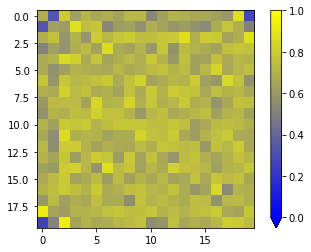

In [389]:
circle = generate_circle(input)
predict(circle, weights)
print(weights)
visualize_weights(weights)